# Logistic Regression as a Single Neuron of a Neural Network

This project is implementation of logistic regression. This has been done for a single neuron of a neural network. The dataset files are provided in the directory of the project.
- Build the general architecture of a learning algorithm, including:
    - Initializing parameters
    - Calculating the cost function and its gradient
    - Using an optimization algorithm (gradient descent) 
- Gather all three functions above into a main model function, in the right order.

## 1 -  Loading Packages ##
First, let's run the cell below to import all the packages that you will need during this assignment. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
import glob
import sklearn
from sklearn.model_selection import train_test_split

from load_dataset import *
# %matplotlib inline

## 2 - Utility functions to convert images into datasets ##
The following functions are used to convert the cats and dogs images in the dataset folder into the numpy array format with labels. 

In [2]:
def convert_image_to_data(image, WIDTH, HEIGHT):
    image_resized = Image.open(image).resize((WIDTH, HEIGHT))
    image_array = np.array(image_resized).T
    return image_array

In [3]:
def create_train_test_data(num_pix,test_size=0.2):
    cat_files = glob.glob("datasets/cat*")
    dog_files = glob.glob("datasets/dog*")

    # Restrict cat and dog files here for testing
    cat_list = [convert_image_to_data(i, num_pix, num_pix) for i in cat_files]
    dog_list = [convert_image_to_data(i, num_pix, num_pix) for i in dog_files]

    y_cat = np.zeros(len(cat_list))
    y_dog = np.ones(len(dog_list))

    X = np.concatenate([cat_list, dog_list])
    X = np.concatenate([cat_list, dog_list])
    y = np.concatenate([y_cat, y_dog])

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)
    return X_train, X_test, y_train, y_test

### 2.1 - Load data set ###
Use the utility functions provided above to load the train_set_x,train_set_y, test_set_x, test_set_y.
Set the `num_pix` to 64 and keep the `test_size` as the default value.

In [4]:

# set the num_pix to 64
num_pix = 64
# load the train_set_x_orig, test_set_x_orig, train_set_y, test_set_y

#train_set_x,test_set_x, train_set_y,test_set_y = create_train_test_data(num_pix)

req_dataset = load_dataset('car_dataset.hdf5')
train_set_x = req_dataset["train"]["X"]
train_set_y = req_dataset["train"]["Y"]
test_set_x = req_dataset["test"]["X"]   
test_set_y = req_dataset["test"]["Y"]
dev_set_x = req_dataset["dev"]["X"]
dev_set_y = req_dataset["dev"]["Y"]
pass

#### 2.1.1 - Print the shapes ###
Print the shape of the following variables
- Number of training examples: m_train
- Number of testing examples: m_test
- Height/Width of each image: num_px
- train_set_x shape
- train_set_y shape
- test_set_x shape
- test_set_y shape

In [5]:

m_train = train_set_x.shape[0]     # No. of training examples
m_test =  test_set_x.shape[0]      # No. of test examples
num_px=64

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))

print ("train_set_x shape: " + str(train_set_x.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x.shape))
print ("test_set_y shape: " + str(test_set_y.shape))


Number of training examples: m_train = 517
Number of testing examples: m_test = 173
Height/Width of each image: num_px = 64
train_set_x shape: (517, 64, 64, 3)
train_set_y shape: (517,)
test_set_x shape: (173, 64, 64, 3)
test_set_y shape: (173,)


#### 2.1.2 - Fixing ill-shape vectors ####
It is possible that the train_set_y and test_set_y have an ill-shape. Fix these shapes so the train_set_y and test_set_y are represented as a matrix with size (1, number of examples)

In [6]:

train_set_y = train_set_y.reshape(train_set_y.shape[0],1).T
test_set_y = test_set_y.reshape(test_set_y.shape[0],1).T
dev_set_y = dev_set_y.reshape(dev_set_y.shape[0],1).T


print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_y shape: " + str(test_set_y.shape))
print ("dev_set_y shape: " + str(dev_set_y.shape))

train_set_y shape: (1, 517)
test_set_y shape: (1, 173)
dev_set_y shape: (1, 172)


### 2.2 - Flatten the data
Reshape the training and test data sets so that each image is flattened into single vectors of shape (num_px  ∗ num_px  ∗ 3, 1). Check the shapes for train_set_x_flatten and test_set_x_flatten.

In [7]:

train_set_x_flatten = train_set_x.reshape(train_set_x.shape[0],-1).T 
test_set_x_flatten = test_set_x.reshape(test_set_x.shape[0],-1).T 
dev_set_x_flatten = dev_set_x.reshape(dev_set_x.shape[0],-1).T 

#Checking shapes
print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))

print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))

print ("dev_set_x_flatten shape: " + str(dev_set_x_flatten.shape))


train_set_x_flatten shape: (12288, 517)
test_set_x_flatten shape: (12288, 173)
dev_set_x_flatten shape: (12288, 172)


### 2.3 - Standardize the data
Divide every row of the dataset by 255 

In [8]:

train_set_x = train_set_x_flatten/255
test_set_x = test_set_x_flatten/255
dev_set_x = dev_set_x_flatten/255

## 3 - Implementing the Helper Functions ## 

### 3.1 - Sigmoid function
Implement `sigmoid()`. 

In [13]:

def sigmoid(z):
    s = 1/(1 + np.exp(-z))
    return s

### 3.2 - Implement initialize_with_zeros
Write a function that initializes initialize w as a vector of zeros and set `b` to zero. 

In [14]:

def initialize_with_zeros(dim):
    
    w = np.zeros(shape=(dim,1))
    b = 0.0

    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

### 3.3 - Forward propagation

Implement forward propagation to calculate $A$ and cost.

Forward Propagation:
- You get X
- You compute $A = \sigma(w^T X + b) = (a^{(0)}, a^{(1)}, ..., a^{(m-1)}, a^{(m)})$
- You calculate the cost function: $J = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)})$


In [12]:

def forward_propagate(w, b, X, Y):
    
    """
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)
    """
    
    m = X.shape[1]                         # compute the number of trainig data
   
    Z =np.dot(w.T,X) + b                   # compute Z
    A = sigmoid(Z)                         # compute activation
                                                              
    cost = -1/m * np.sum(Y* np.log(A)+ (1-Y)*np.log(1-A))  # compute cost
    
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    return cost

### 3.4 - Backward propagation

Implement backward propagation to compute gradients $dw$ and $db$
Here are the two formulas you will be using: 

$$ dw = \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T\tag{7}$$
$$ db = \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})\tag{8}$$

In [15]:

def backward_propagate(w, b, X, Y):
    
    """
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)
    """
    
    m = X.shape[1]                         # compute the number of trainig data
   
    Z =np.dot(w.T,X) + b                   # compute Z
    A = sigmoid(Z)                         # compute activation
                                                              
    dz = A-Y
    dw = (1/m) * np.dot(X, dz.T)
    db = (1/m) * np.sum(dz)
    
    assert(dw.shape == dw.shape)
    assert(db.dtype == float)
    
    gradients = {"dw":dw , "db":db}
    
    return gradients

### 3.5 - Optimization
- You have initialized your parameters.
- You are also able to compute a cost function and its gradient.
- Now, you want to update the parameters using gradient descent.

Write down the optimization function. The goal is to learn $w$ and $b$ by minimizing the cost function $J$. 

In [16]:
# your code here
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    costs = []
    
    for i in range(num_iterations):
        
        # Cost and gradient calculation 
        cost = forward_propagate(w,b,X,Y)
        gradient = backward_propagate(w,b,X,Y)
        
        # Retrieve derivatives from grads dictionary
        dw = gradient['dw']
        db = gradient['db']  
        
        # update learning rule 
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        # Record the costs every 100 iterations
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training examples
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w, "b": b}
    
    gradients = {"dw": dw, "db": db}

    return params, gradients, costs

### 3.6 - Prediction

Implement the `predict()` function. There is two steps to computing predictions:

1. Calculate $\hat{Y} = A = \sigma(w^T X + b)$

2. Convert the entries of a into 0 (if activation <= 0.5) or 1 (if activation > 0.5), stores the predictions in a vector `Y_prediction`. If you wish, you can use an `if`/`else` statement in a `for` loop (though there is also a way to vectorize this). 

In [17]:
# your code here
def predict(w, b, X):
    
    m = X.shape[1]
    
    # Y_prediction = np.zeros((1,m))
    
    # w = w.reshape(X.shape[0], 1)
    
    # Finding vector A which predicts the probability of cat being present in the picture
    Z= np.dot(w.T,X) + b
    A = sigmoid(Z)
    
    Y_prediction = np.around(A)
    
    #for i in range(A.shape[1]):
        # Convert probabilities A[0,i] to actual predictions p[0,i]
    #    Y_prediction[0,i]= np.around(A[0,i])
        
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

## 4 - Regression Model ##
Implement the model function. Use the following notation:
    - Y_prediction for your predictions on the test set
    - Y_prediction_train for your predictions on the train set
    - w, costs, grads for the outputs of optimize()

In [19]:
# your code here
def model(X_train, Y_train, X_test, Y_test, num_iterations, learning_rate, print_cost=False):
    
    n = X_train.shape[0]
    w, b = initialize_with_zeros(dim=n)
    
    parameters, gradients, costs = optimize(w,b,X_train ,Y_train, num_iterations, learning_rate, print_cost)
                                            
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters['w']
    b = parameters['b']

    # Predict test/train set examples 
    Y_prediction       = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)
    
    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction - Y_test)) * 100))

    d = {"costs": costs,
         "Y_prediction_test": Y_prediction, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    return d

## 5. Run the regression model function to train your model.
### 5.1 - Setting parameters (part 1)
Set the `num_iterations` to 5000 and `learning_rate` to 0.0005

In [20]:
# For train data and test data

d1 = model(train_set_x, train_set_y, test_set_x, test_set_y, 5000, 0.0005, print_cost = True) 

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.548509
Cost after iteration 200: 0.496297
Cost after iteration 300: 0.459536
Cost after iteration 400: 0.432244
Cost after iteration 500: 0.411066
Cost after iteration 600: 0.394034
Cost after iteration 700: 0.379940
Cost after iteration 800: 0.368004
Cost after iteration 900: 0.357705
Cost after iteration 1000: 0.348679
Cost after iteration 1100: 0.340667
Cost after iteration 1200: 0.333477
Cost after iteration 1300: 0.326965
Cost after iteration 1400: 0.321019
Cost after iteration 1500: 0.315553
Cost after iteration 1600: 0.310498
Cost after iteration 1700: 0.305796
Cost after iteration 1800: 0.301404
Cost after iteration 1900: 0.297283
Cost after iteration 2000: 0.293401
Cost after iteration 2100: 0.289732
Cost after iteration 2200: 0.286254
Cost after iteration 2300: 0.282948
Cost after iteration 2400: 0.279796
Cost after iteration 2500: 0.276785
Cost after iteration 2600: 0.273902
Cost after iteration 2700: 0.271136
Cost

**Expected Output**: 

<table style="width:40%"> 
    
    <tr>
        <td> **Train Accuracy**  </td> 
        <td> 91.25 % </td>
    </tr>

    <tr>
        <td>**Test Accuracy** </td> 
        <td> 60.0 % </td>
    </tr>
</table> 




Let's also plot the cost function and the gradients.

In [21]:
d2 = model(train_set_x, train_set_y, dev_set_x, dev_set_y, 5000, 0.0005, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.548509
Cost after iteration 200: 0.496297
Cost after iteration 300: 0.459536
Cost after iteration 400: 0.432244
Cost after iteration 500: 0.411066
Cost after iteration 600: 0.394034
Cost after iteration 700: 0.379940
Cost after iteration 800: 0.368004
Cost after iteration 900: 0.357705
Cost after iteration 1000: 0.348679
Cost after iteration 1100: 0.340667
Cost after iteration 1200: 0.333477
Cost after iteration 1300: 0.326965
Cost after iteration 1400: 0.321019
Cost after iteration 1500: 0.315553
Cost after iteration 1600: 0.310498
Cost after iteration 1700: 0.305796
Cost after iteration 1800: 0.301404
Cost after iteration 1900: 0.297283
Cost after iteration 2000: 0.293401
Cost after iteration 2100: 0.289732
Cost after iteration 2200: 0.286254
Cost after iteration 2300: 0.282948
Cost after iteration 2400: 0.279796
Cost after iteration 2500: 0.276785
Cost after iteration 2600: 0.273902
Cost after iteration 2700: 0.271136
Cost

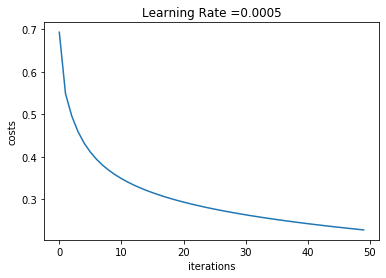

In [22]:
# Plot learning curve (with costs) for part 1

# For train and test data
costs = np.squeeze(d1['costs'])
plt.plot(costs)
plt.ylabel('costs')
plt.xlabel('iterations')
plt.title("Learning Rate =" + str(d1['learning_rate']))
plt.show()

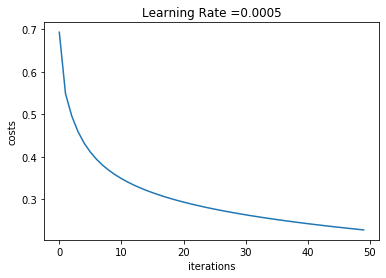

In [23]:

# For train and dev data
costs = np.squeeze(d2['costs'])
plt.plot(costs)
plt.ylabel('costs')
plt.xlabel('iterations')
plt.title("Learning Rate =" + str(d2['learning_rate']))
plt.show()

### 5.1 - Setting parameters (part 2)
Set the `num_iterations` to 2000 and `learning_rate` to 0.005 and run the model again. on.

In [20]:
# your code here
d3= model(train_set_x, train_set_y, test_set_x, test_set_y, 2000, 0.005, print_cost = True) 

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.348325
Cost after iteration 200: 0.293235
Cost after iteration 300: 0.263346
Cost after iteration 400: 0.242531
Cost after iteration 500: 0.226353
Cost after iteration 600: 0.213014
Cost after iteration 700: 0.201614
Cost after iteration 800: 0.191640
Cost after iteration 900: 0.182771
Cost after iteration 1000: 0.174791
Cost after iteration 1100: 0.167547
Cost after iteration 1200: 0.160925
Cost after iteration 1300: 0.154839
Cost after iteration 1400: 0.149219
Cost after iteration 1500: 0.144009
Cost after iteration 1600: 0.139162
Cost after iteration 1700: 0.134640
Cost after iteration 1800: 0.130409
Cost after iteration 1900: 0.126441
train accuracy: 97.48549323017409 %
test accuracy: 89.59537572254335 %


In [21]:
d4= model(train_set_x, train_set_y, dev_set_x, dev_set_y, 2000, 0.005, print_cost = True) 

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.348325
Cost after iteration 200: 0.293235
Cost after iteration 300: 0.263346
Cost after iteration 400: 0.242531
Cost after iteration 500: 0.226353
Cost after iteration 600: 0.213014
Cost after iteration 700: 0.201614
Cost after iteration 800: 0.191640
Cost after iteration 900: 0.182771
Cost after iteration 1000: 0.174791
Cost after iteration 1100: 0.167547
Cost after iteration 1200: 0.160925
Cost after iteration 1300: 0.154839
Cost after iteration 1400: 0.149219
Cost after iteration 1500: 0.144009
Cost after iteration 1600: 0.139162
Cost after iteration 1700: 0.134640
Cost after iteration 1800: 0.130409
Cost after iteration 1900: 0.126441
train accuracy: 97.48549323017409 %
test accuracy: 91.86046511627907 %


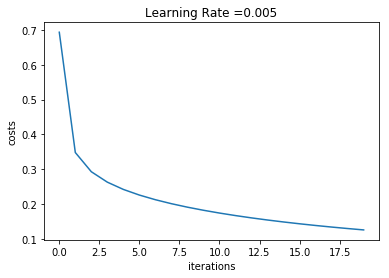

In [22]:
# Plot learning curve (with costs) for part 2

# For train and test data
costs = np.squeeze(d3['costs'])
plt.plot(costs)
plt.ylabel('costs')
plt.xlabel('iterations')
plt.title("Learning Rate =" + str(d3['learning_rate']))
plt.show()

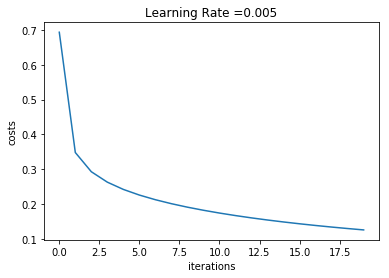

In [25]:

# For train and dev data
costs = np.squeeze(d4['costs'])
plt.plot(costs)
plt.ylabel('costs')
plt.xlabel('iterations')
plt.title("Learning Rate =" + str(d4['learning_rate']))
plt.show()

## 5.3 - Analysis
### Note:
While calling the model function, I have called it four times as follows:
d1 = Train and test data for 5000 iterations and 0.0005 learning rate
d2 = Train and dev data for 5000 iterations and 0.0005 learning rate
d3 = Train and test data for 2000 iterations and 0.005 learning rate
d4 = Train and dev data for 2000 iterations and 0.005 learning rate



The learning rate determines how rapidly we update the parameters. If the learning rate is too large we may "overshoot" the optimal value. Similarly, if it is too small we will need too many iterations to converge to the best values. That's why it is crucial to use a well-tuned learning rate.

### Case 1:

The graph of cost vs iteration gradually decreases for first two plots(graphs), with smooth curve. For this case, we have number of iterations are higher as compared to other case and the learning rate is smaller.


### For train and test data:
train accuracy: 92.06963249516441 %
test accuracy: 87.28323699421965 %
Here, we are getting better result as compared to train and test data for CASE2, since train accuracy and test accuracy are almost same, and test accuracy is smaller than train accuracy. 


### For train and dev data:
train accuracy: 92.06963249516441 %
dev accuracy: 92.44186046511628 %

Here, also we are getting smooth curve which shows we are getting better result for this case as compared to train and dev data for case2.


### Case2:
The graph of cost vs iteration also gradually decreases for last two plots(graphs), with intermittent curves, as in there is steep curve in the beginning. Also, the number of iterations have decreased and learning rate has increased for below two executions.

### For train and test data:
train accuracy: 97.48549323017409 %
test accuracy: 89.59537572254335 %

Here, as compared to train and test data for Case 1, the test accuracy is decreased for increase number of iterations, so it is overfitting.However, the training accuracy is decreasing for increase in number of iterations.

### For train and dev data:
train accuracy: 97.48549323017409 %
dev accuracy: 91.86046511627907 %

Here, as compared to train and dev data for Case1, the dev data is increased for increase in number of iterations, so it is not overfitting.However, the training accuracy is decreasing for increase in number of iterations.
